# Industrial Noise Levels

## Project Overview:



## Datasets Overview :

**Година**: The year in which the data was collected.(2015/2016)

**РИОСВ**: The code corresponding to the specific region or area where the measurements were taken.

**Вид измервания**: The type of measurement conducted, indicating whether it's a regular measurement, complaint-based measurement, etc.

**Местоположение на промишления източник съгласно Наредба №6**: The designated location of the industrial source according to regulations.

**Име на оператор**: The name of the operator responsible for the industrial source.

**БУЛСТАТ**: The Bulgarian national identification number of the operator.

**Телефон**: The contact phone number of the operator.

**Факс**: The fax number of the operator.

**Описание на промишлена площадка**: A description of the industrial site.

**Предмет на дейност на площадката**: The nature of the activities conducted on the industrial site.

**Населено място и адрес на площадката**: The address and location of the industrial site.

**Режим на работа (в часове/ден)**: The operational hours of the industrial site.

**Разстояние до най-близката жилищна или обществена сграда (m)**: The distance to the nearest residential or public building.

**Пореден номер на измерване**: The sequential number assigned to the measurement.

**Период на извършване на измерванията**: The time period during which the measurements were conducted.

**Ниво на шума по границата на промишления източник**: The noise level at the boundary of the industrial source.

**Ниво на шума в мястото на въздействие**: The noise level at the impact site.

**Дата на измерване**: The date when the measurements were taken.

**Забележка**: Any additional notes or remarks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# First we load the original DataFrame, skipping the first three rows containing non-data header information.(2015)

In [2]:
data_2015 = pd.read_csv("industrial_noise_2015.csv", skiprows = 3)

print("DataFrame 2015:")
print(data_2015.head())

DataFrame 2015:
        1            2                             3  \
0  2015.0  Благоевград   Контролни по годишен график   
1  2015.0  Благоевград   Контролни по годишен график   
2  2015.0  Благоевград   Контролни по годишен график   
3  2015.0  Благоевград   Контролни по годишен график   
4  2015.0  Благоевград  Контролни по жалби и сигнали   

                                          4                           5  \
0  Производствено-складови територии и зони         „Пирин пеллет“ ЕООД   
1  Производствено-складови територии и зони                "Бонана" ООД   
2  Производствено-складови територии и зони               "Рива- 21" АД   
3  Производствено-складови територии и зони                "Амана" ЕООД   
4  Производствено-складови територии и зони  ЕТ "Димитър Христов- Нети"   

           6            7           8  \
0  175142573   0747/82543  0747/82543   
1  811196679   0745/60671  0745/60673   
2  101160400   0745/61460           -   
3  202492538  0893/600578       

# Cleaning and Preprocessing

# **rename the columns**

In [3]:
new_column_names = [
    "Година", "РИОСВ", "Вид измервания", "Местоположение на промишления източник съгласно Наредба №6",
    "Име на оператор", "БУЛСТАТ", "Телефон", "Факс", "Описание на промишлена площадка",
    "Предмет на дейност на площадката", "Населено място и адрес на площадката",
    "Режим на работа (в часове/ден)", "Разстояние до най-близката жилищна или обществена сграда (m)",
    "Пореден номер на измерване", "Период на извършване на измерванията",
    "Ниво на шума по границата на промишления източник/Гранична стойност на показателите на шума (dB(A))",
    "Измерено ниво на шум (dB(A))", "Съответствие с нормативната уредба",
    "Ниво на шума в мястото на въздействие/Гранична стойност на показателите на шума (dB(A))",
    "Измерено ниво на шум (dB(A))", "Съответствие с нормативната уредба", "Дата на измерване", "Забележка"
]
data_2015.columns = new_column_names

print("Renamed DataFrame:")
print(data_2015.head())

Renamed DataFrame:
   Година        РИОСВ                Вид измервания  \
0  2015.0  Благоевград   Контролни по годишен график   
1  2015.0  Благоевград   Контролни по годишен график   
2  2015.0  Благоевград   Контролни по годишен график   
3  2015.0  Благоевград   Контролни по годишен график   
4  2015.0  Благоевград  Контролни по жалби и сигнали   

  Местоположение на промишления източник съгласно Наредба №6  \
0           Производствено-складови територии и зони           
1           Производствено-складови територии и зони           
2           Производствено-складови територии и зони           
3           Производствено-складови територии и зони           
4           Производствено-складови територии и зони           

              Име на оператор    БУЛСТАТ      Телефон        Факс  \
0         „Пирин пеллет“ ЕООД  175142573   0747/82543  0747/82543   
1                "Бонана" ООД  811196679   0745/60671  0745/60673   
2               "Рива- 21" АД  101160400   0745/6146

# **summary of data types and column names for a dataset (2015)**

In [4]:
data_2015.dtypes

Година                                                                                                 float64
РИОСВ                                                                                                   object
Вид измервания                                                                                          object
Местоположение на промишления източник съгласно Наредба №6                                              object
Име на оператор                                                                                         object
БУЛСТАТ                                                                                                 object
Телефон                                                                                                 object
Факс                                                                                                    object
Описание на промишлена площадка                                                                         object
П

# **Checking for missing values**

In [5]:
missing_values = data_2015.isna().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Година                                                                                                 216
РИОСВ                                                                                                  212
Вид измервания                                                                                         193
Местоположение на промишления източник съгласно Наредба №6                                             194
Име на оператор                                                                                        258
БУЛСТАТ                                                                                                194
Телефон                                                                                                242
Факс                                                                                                   362
Описание на промишлена площадка                                                                        166
Предмет на дейност на

## data preprocessing and cleaning on a dataset

**1 - Impute Missing Values for Categorical Columns**: The code starts by defining a list of categorical column names (categorical_columns_to_impute) that need missing value imputation. It seems to be a dataset containing information related to noise measurements in an industrial context. For each column name in the list, the code uses .fillna("N/A", inplace=True) to replace missing values with the string "N/A" in the corresponding categorical column of the data_2015 DataFrame.

**2- Clean and Convert Column to Numeric**: The code then focuses on a specific column named "Ниво на шума по границата на промишления източник/Гранична стойност на показателите на шума (dB(A))". It removes the string ' dB/А/' from its values using .str.replace() and strips any trailing whitespace using .str.strip().

**3-Convert Values to Float**: This section aims to convert the values in the aforementioned numeric column to floating-point numbers. It uses a try-except block to handle any conversion errors and replaces those errors with NaN values (errors="coerce"). The resulting numeric values are stored in the same column in the DataFrame.

**4-Fill Missing Numeric Values with Mean**: The code calculates the mean of the numeric column and assigns it to the variable mean_value. It then fills any missing values in the numeric column with this mean value using .fillna().

**5-Convert and Impute "Пореден номер на измерване" Column**: The column "Пореден номер на измерване" (which seems to represent measurement serial numbers) is converted to numeric values using pd.to_numeric(). The missing values are also handled in the same way as before, by replacing conversion errors with NaN values.

**6-Drop Unnecessary Columns**: The code drops the column named "Забележка" from the DataFrame data_2015 using the .drop() function, effectively removing this column from the dataset.

**7-Print Processed Data**: Finally, the code prints the first few rows of the processed DataFrame using .head() to display the changes made by the data preprocessing steps.

In [6]:
# 1
categorical_columns_to_impute = ["РИОСВ", "Вид измервания", "Местоположение на промишления източник съгласно Наредба №6",
                                 "Име на оператор", "БУЛСТАТ", "Телефон", "Факс", "Описание на промишлена площадка",
                                 "Предмет на дейност на площадката", "Населено място и адрес на площадката",
                                 "Режим на работа (в часове/ден)", "Период на извършване на измерванията",
                                 "Съответствие с нормативната уредба", "Съответствие с нормативната уредба"]
for column in categorical_columns_to_impute:
    data_2015.loc[:,column].fillna("N/A", inplace=True)

# 2
data_2015["Ниво на шума по границата на промишления източник/Гранична стойност на показателите на шума (dB(A))"] = \
    data_2015["Ниво на шума по границата на промишления източник/Гранична стойност на показателите на шума (dB(A))"].str.replace(' dB/А/', '').str.strip()

# 3
numeric_column = "Ниво на шума по границата на промишления източник/Гранична стойност на показателите на шума (dB(A))"
data_2015[numeric_column] = pd.to_numeric(data_2015[numeric_column], errors="coerce")

# 4
mean_value = data_2015[numeric_column].mean()
data_2015[numeric_column].fillna(mean_value, inplace=True)

# 5
data_2015["Пореден номер на измерване"] = pd.to_numeric(data_2015["Пореден номер на измерване"], errors="coerce")

# 6
columns_to_drop = ["Забележка"]
data_2015.drop(columns=columns_to_drop, inplace=True)

#7
print(data_2015.head())


   Година        РИОСВ                Вид измервания  \
0  2015.0  Благоевград   Контролни по годишен график   
1  2015.0  Благоевград   Контролни по годишен график   
2  2015.0  Благоевград   Контролни по годишен график   
3  2015.0  Благоевград   Контролни по годишен график   
4  2015.0  Благоевград  Контролни по жалби и сигнали   

  Местоположение на промишления източник съгласно Наредба №6  \
0           Производствено-складови територии и зони           
1           Производствено-складови територии и зони           
2           Производствено-складови територии и зони           
3           Производствено-складови територии и зони           
4           Производствено-складови територии и зони           

              Име на оператор    БУЛСТАТ      Телефон        Факс  \
0         „Пирин пеллет“ ЕООД  175142573   0747/82543  0747/82543   
1                "Бонана" ООД  811196679   0745/60671  0745/60673   
2               "Рива- 21" АД  101160400   0745/61460           -   
3 

c:\users\boni_\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
c:\users\boni_\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


### The code print(data_2015.describe()) generates a statistical summary of the numeric columns in the DataFrame data_2015. 

**1 - Година (Year)**:

**Count**: The number of non-missing values in the "Година" column is 631.

**Mean**: The average year in this dataset is 2015, which is expected given the context.

**Standard Deviation (Std)**: The standard deviation is 0.0, indicating that all values in this column are the same (2015).

**Min**: The minimum value is 2015, which is the same as the mean.

**25th Percentile (25%)**: At least 25% of the values are 2015.

**Median (50%)**: The median year is also 2015, as expected.

**75th Percentile (75%)**: At least 75% of the values are 2015.

**Max**: The maximum value is 2015, consistent with the rest of the statistics.

**2-Пореден номер на измерване (Measurement Serial Number)**:

**Count**: There are 843 non-missing values in this column.

**Mean**: The average measurement serial number is approximately 2.56.

**Std**: The standard deviation is about 3.04, indicating some variability in the serial numbers.

**Min**: The minimum serial number is 1.

**25%**: The 25th percentile value is 1, indicating that at least 25% of the serial numbers are 1.

**Median**: The median serial number is also 1.

**75%**: The 75th percentile value is 3
.
**Max**: The maximum serial number is 24.

**3-Ниво на шума по границата на промишления източник/Гранична стойност на показателите на шума (dB(A)) (Noise Level at Industrial Source/Noise Level Limit)**:

**Count**: There are 781 non-missing values in this column.

**Mean**: The average noise level is approximately 69.83 dB(A).

**Std**: The standard deviation is about 1.48, indicating some variability in noise levels.

**Min**: The minimum noise level is 55 dB(A).

**25%**: The 25th percentile value is 70 dB(A).

**Median**: The median noise level is also 70 dB(A).

**75%**: The 75th percentile value is 70 dB(A).

**Max**: The maximum noise level is 70 dB(A).

In [7]:
print(data_2015.describe())

       Година  Пореден номер на измерване  \
count   631.0                  843.000000   
mean   2015.0                    2.559905   
std       0.0                    3.041230   
min    2015.0                    1.000000   
25%    2015.0                    1.000000   
50%    2015.0                    1.000000   
75%    2015.0                    3.000000   
max    2015.0                   24.000000   

       Ниво на шума по границата на промишления източник/Гранична стойност на показателите на шума (dB(A))  
count                                         781.000000                                                    
mean                                           69.827145                                                    
std                                             1.477031                                                    
min                                            55.000000                                                    
25%                                            70

**generating a single figure with two histograms displayed side by side. The histograms represent the distribution of values in the first and second numeric columns of the DataFrame data_2015. Each subplot has its own title, x-axis label, and y-axis label. The purpose of this code is to visually compare the distributions of the two selected numeric columns using histograms.**

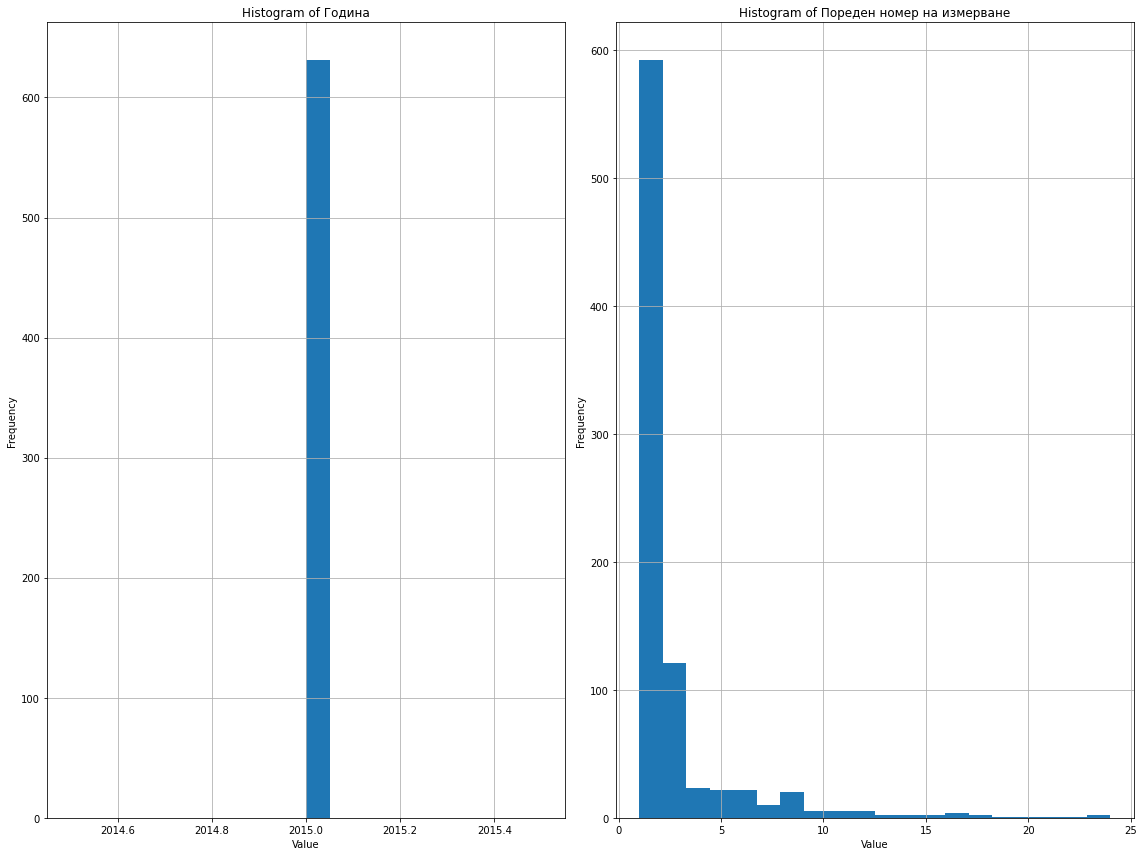

In [8]:
numeric_columns = data_2015.select_dtypes(include = ['float64', 'int64']).columns
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 12))


data_2015[numeric_columns[0]].hist(bins = 20, ax = axes[0])
axes[0].set_title("Histogram of " + numeric_columns[0])
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

# Plot the second histogram
data_2015[numeric_columns[1]].hist(bins = 20, ax = axes[1])
axes[1].set_title("Histogram of " + numeric_columns[1])
axes[1].set_xlabel("Value")  
axes[1].set_ylabel("Frequency")  

plt.tight_layout()
plt.show()

**this code generates a heatmap that visually represents the correlation between numeric columns in the DataFrame data_2015. The color intensity in the heatmap cells indicates the strength and direction of correlation between pairs of columns. Positive correlations are often shown in warmer colors (reds), negative correlations in cooler colors (blues), and weaker correlations in lighter shades. The annotations within the cells provide the actual correlation coefficient values for better understanding. This heatmap helps identify relationships between the numerical features.**

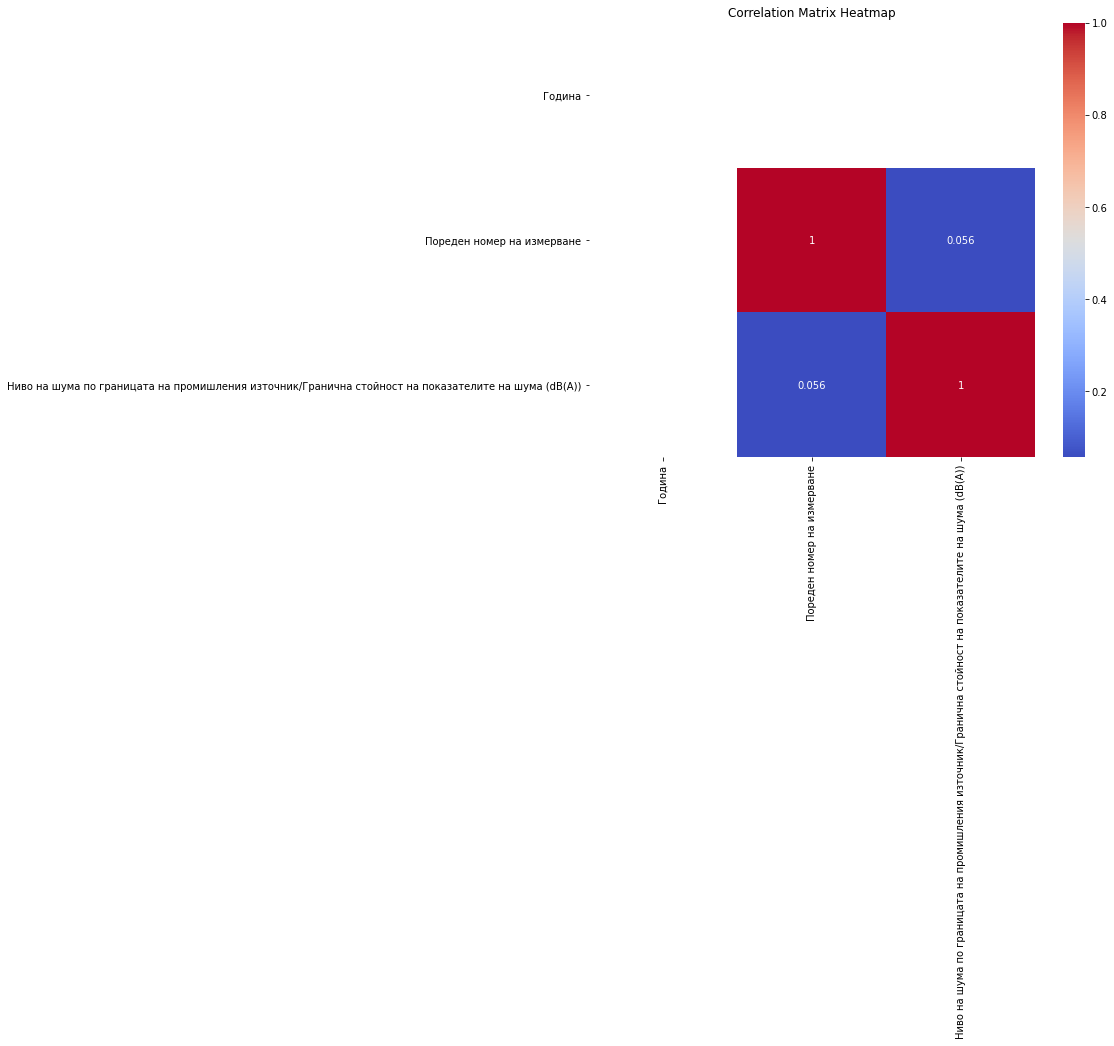

In [9]:
correlation_matrix = data_2015[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap = "coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

**The code iterates through unique "РИОСВ" values, generating a separate count plot for each value. These count plots show the distribution of the "Вид измервания" categories within each subset defined by "РИОСВ". This visualization helps in understanding how the distribution of measurement types varies across different values of "РИОСВ"**

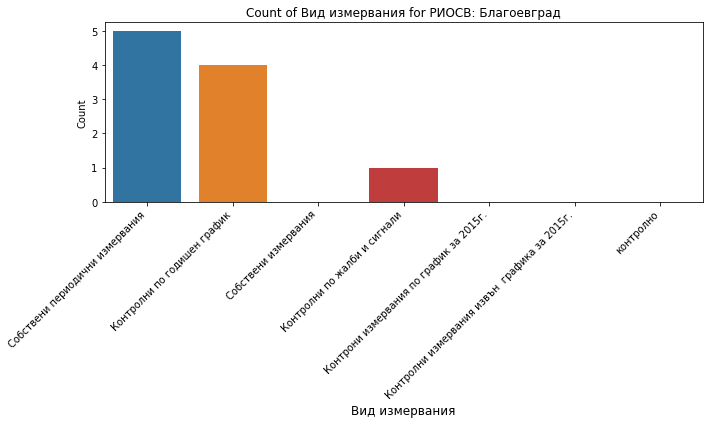

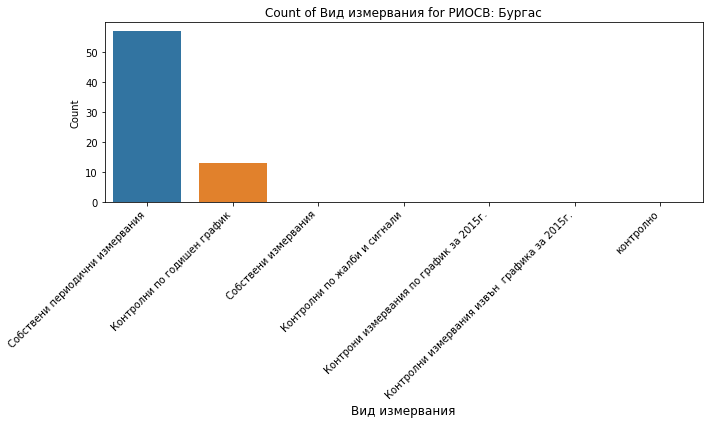

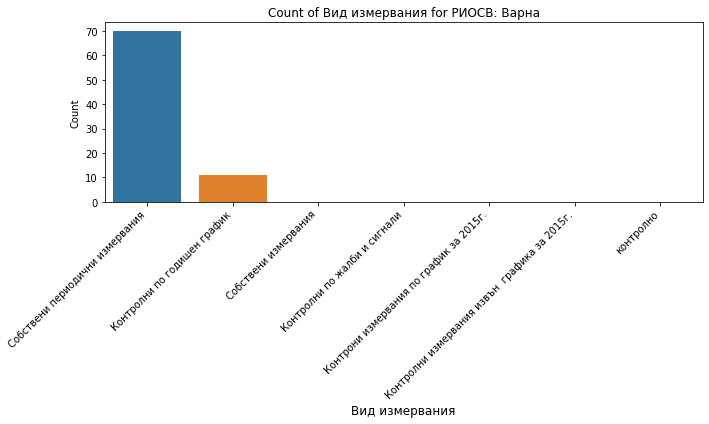

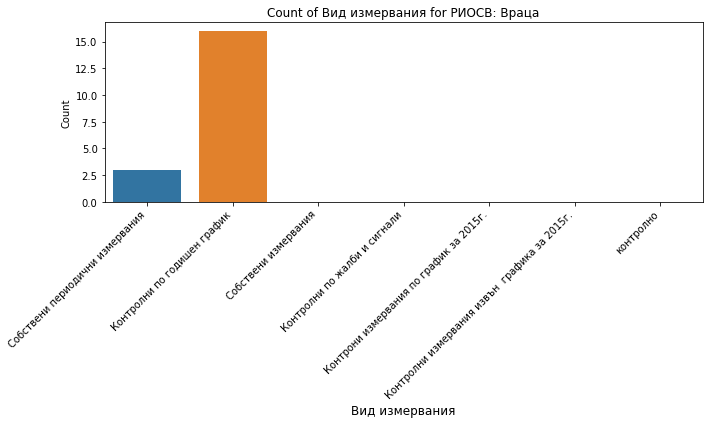

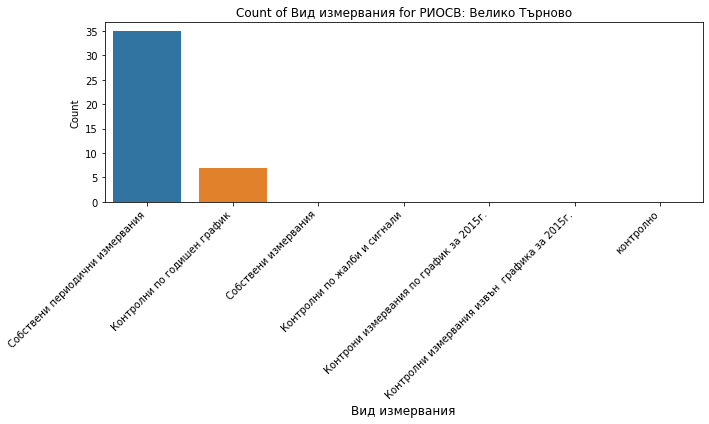

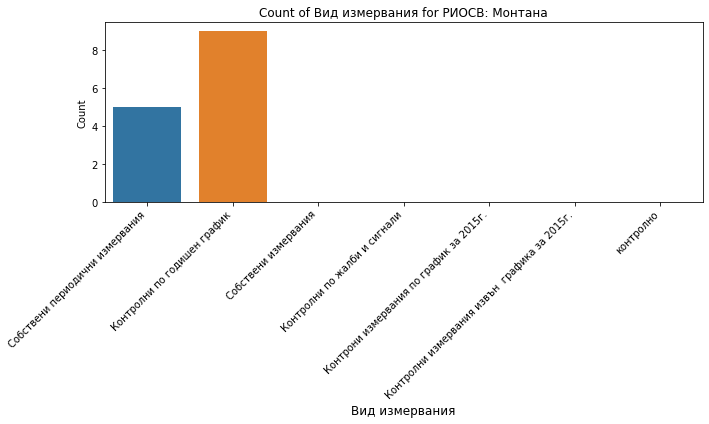

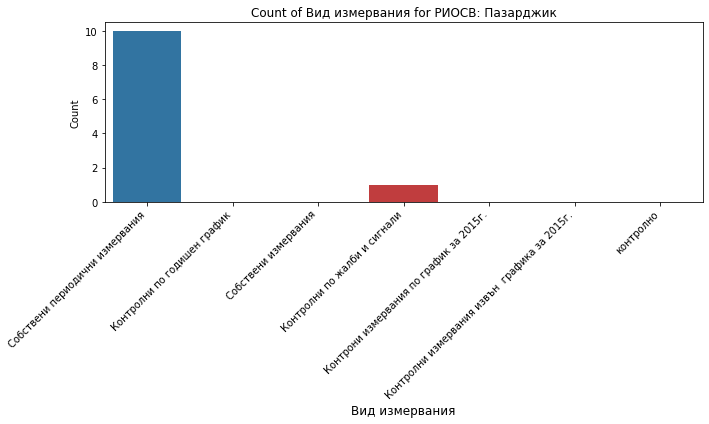

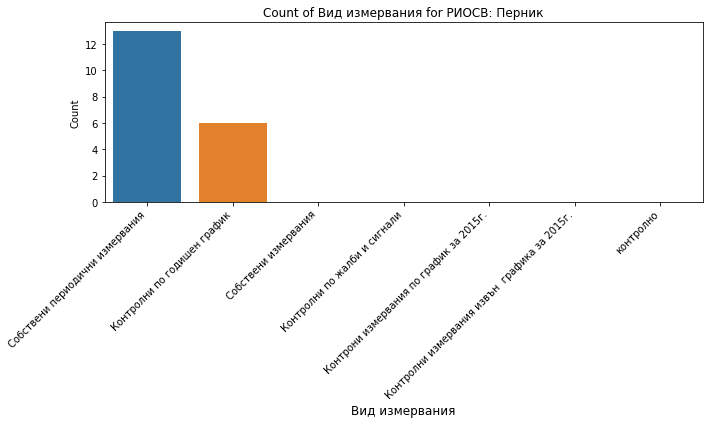

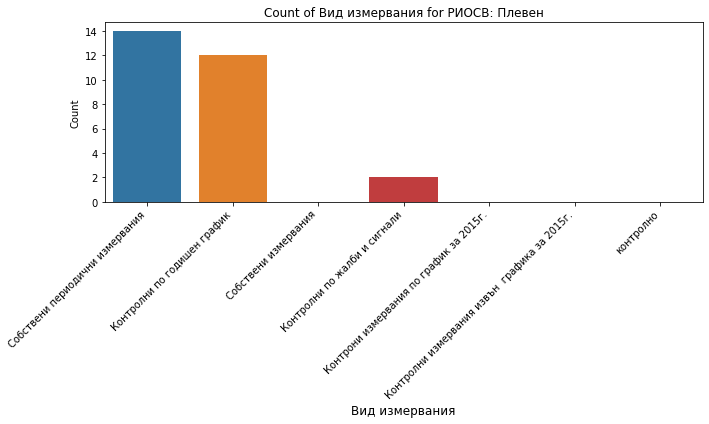

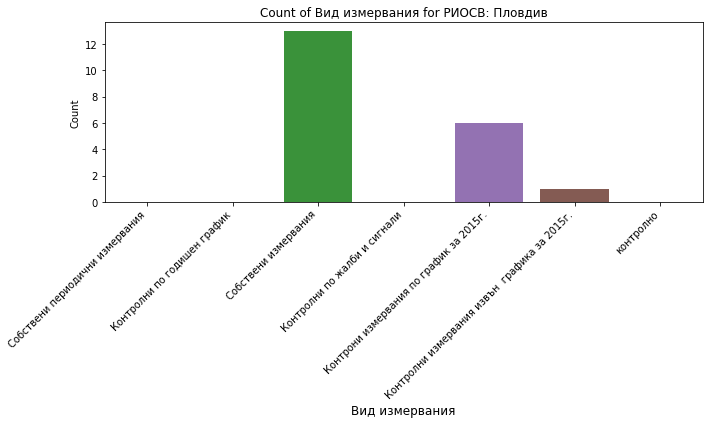

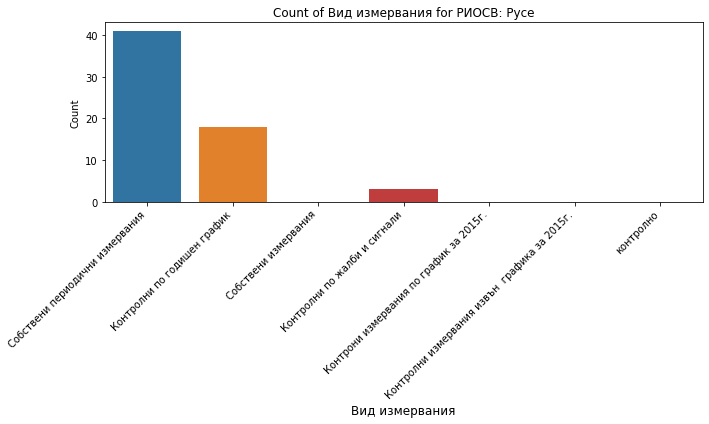

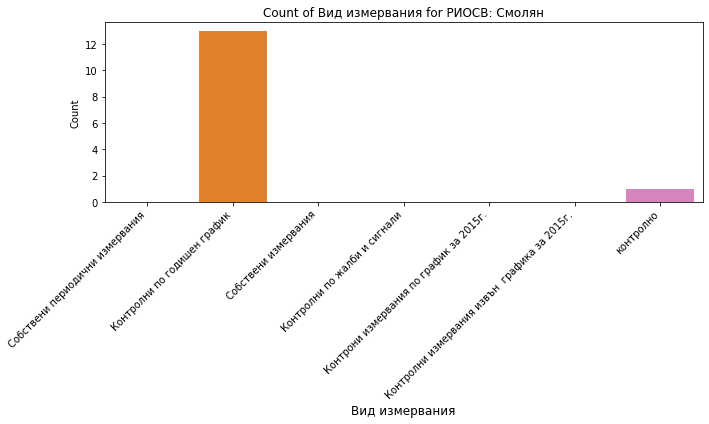

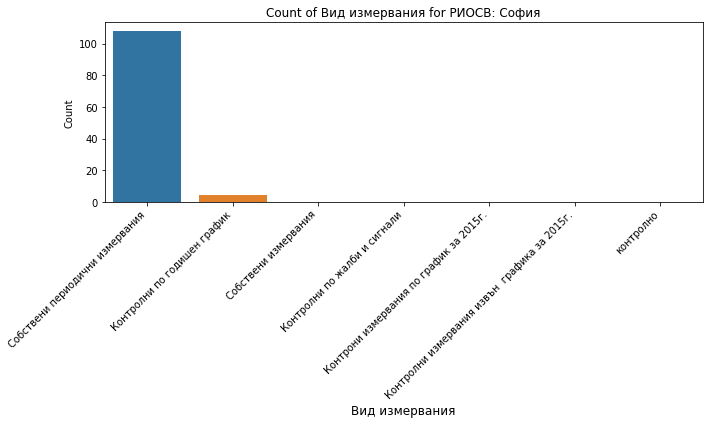

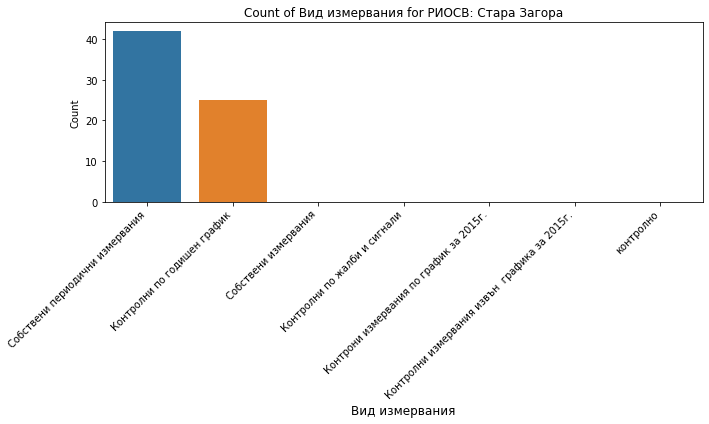

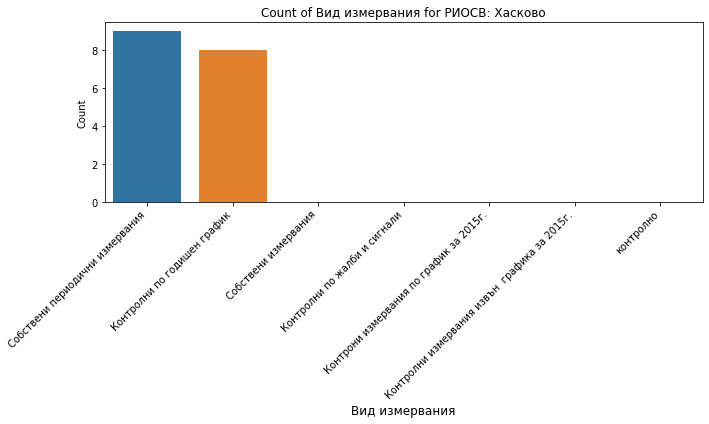

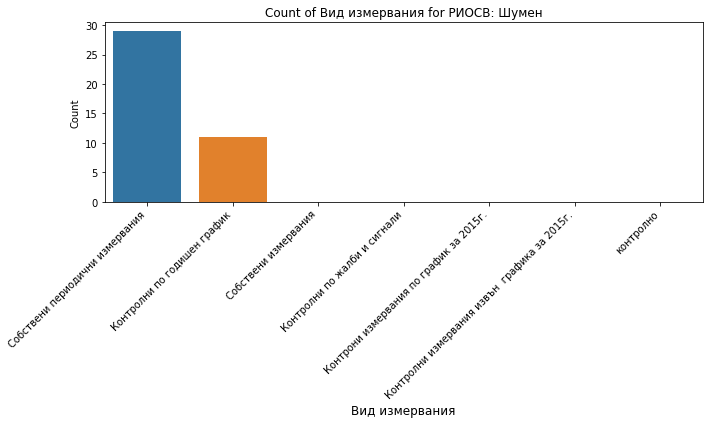

In [10]:
riosv_values = data_2015["РИОСВ"].unique()

for riosv_value in riosv_values:
    filtered_data = data_2015[data_2015["РИОСВ"] == riosv_value].dropna(subset = ["РИОСВ"])
    
    if not filtered_data.empty:
        plt.figure(figsize = (10, 6))
        sns.countplot(data = data_2015[data_2015["РИОСВ"] == riosv_value], x = "Вид измервания", order=data_2015["Вид измервания"].value_counts().index)
        plt.title(f'Count of Вид измервания for РИОСВ: {riosv_value}')
        plt.xlabel("Вид измервания", fontsize = 12)  # Adjust font size
        plt.ylabel("Count")
        plt.xticks(rotation = 45, ha = 'right', fontsize=10)  # Adjust rotation and font size
        plt.tight_layout()  # Improve spacing
        plt.show()


## Stats

**1-Calculate Means and Medians for Numeric Columns**:

**2-Print Means and Medians:**
These lines print the calculated means and medians for each numeric column.

**3-Calculate Standard Deviations**:
Computes the standard deviations for each numeric column in the DataFrame data_2015 and stores them in the Series std_devs.

**4-Print Standard Deviations**:
Prints the calculated standard deviations for each numeric column.

**5-Perform Hypothesis Testing (T-Test) for Two Groups**:
The code selects data from two groups based on the value of the "РИОСВ" column ("Риоcв1" and "Риоcв2"). Specifically, it extracts the "Измерено ниво на шум (dB(A))" column values for these two groups.

**6-Determine Significance of the T-Test Results**:
The code checks if any of the p-values are less than 0.05 (common significance level). If any p-value is below this threshold, it is typically interpreted as evidence of a significant difference between the groups. Otherwise, there is no significant difference.

**7-Calculate Correlations Between Numeric Columns**:
Computes the correlation matrix between numeric columns in the DataFrame data_2015.

**8-Print Correlation Matrix**:

In [11]:
numeric_columns = data_2015.select_dtypes(include=['float64', 'int64']).columns
means = data_2015[numeric_columns].mean()
medians = data_2015[numeric_columns].median()

print("Means:")
print(means)

print("\nMedians:")
print(medians)

std_devs = data_2015[numeric_columns].std()

print("\nStandard Deviations:")
print(std_devs)

group_1 = data_2015[data_2015['РИОСВ'] == 'Риоcв1']['Измерено ниво на шум (dB(A))']
group_2 = data_2015[data_2015['РИОСВ'] == 'Риоcв2']['Измерено ниво на шум (dB(A))']

t_statistic, p_value = stats.ttest_ind(group_1, group_2)
print("\nT-Test Results:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
if (p_value < 0.05).any():
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")

correlation_matrix = data_2015[numeric_columns].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Means:
Година                                                                                                 2015.000000
Пореден номер на измерване                                                                                2.559905
Ниво на шума по границата на промишления източник/Гранична стойност на показателите на шума (dB(A))      69.827145
dtype: float64

Medians:
Година                                                                                                 2015.0
Пореден номер на измерване                                                                                1.0
Ниво на шума по границата на промишления източник/Гранична стойност на показателите на шума (dB(A))      70.0
dtype: float64

Standard Deviations:
Година                                                                                                 0.000000
Пореден номер на измерване                                                                             3.041230
Ниво на шума по границата на про

## Modeling

**performs a linear regression analysis to predict noise levels based on a selected feature (measurement serial number) from the dataset**.

**1-Selecting Columns of Interest**:


**2-Removing Rows with Missing Values**:
Any rows with missing values in data_selected are removed.

**3-Splitting Data and Features**:


**4-Splitting Data into Training and Testing Sets**:

**5-Initializing and Fitting Linear Regression Model**:

**6-Making Predictions and Evaluating the Model**:
y_pred = model.predict(X_test)
The trained model is used to predict noise levels on the testing data.
mse = mean_squared_error(y_test, y_pred)
The mean squared error (MSE) is calculated to evaluate the model's performance.
r2 = r2_score(y_test, y_pred)
The R-squared (coefficient of determination) score is calculated to assess the model's goodness of fit.

**7-Plotting Actual vs. Predicted Values**:
A scatter plot of actual noise levels (blue points) against predicted noise levels (red line) is created.

**8-Printing Model Evaluation Metrics**:
The mean squared error and R-squared score are printed as measures of the model's accuracy and fit.

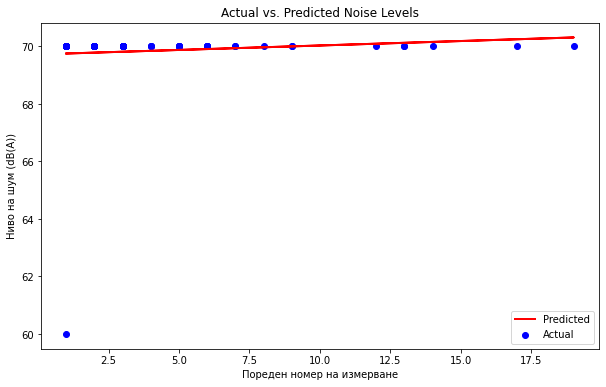

Model Evaluation:
Mean Squared Error: 0.653131849037233
R-squared: -0.03199018890504868


In [12]:
selected_columns = ['Пореден номер на измерване', 'Ниво на шума по границата на промишления източник/Гранична стойност на показателите на шума (dB(A))']
data_selected = data_2015[selected_columns].copy()

data_selected.dropna(inplace = True)

X = data_selected['Пореден номер на измерване'].values.reshape(-1, 1)
y = data_selected['Ниво на шума по границата на промишления източник/Гранична стойност на показателите на шума (dB(A))'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting the actual vs. predicted values
plt.figure(figsize = (10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Пореден номер на измерване')
plt.ylabel('Ниво на шум (dB(A))')
plt.title('Actual vs. Predicted Noise Levels')
plt.legend()
plt.show()

print("Model Evaluation:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)



In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Избиране на колоните от данните
selected_columns = ['Пореден номер на измерване', 'Ниво на шума по границата на промишления източник/Гранична стойност на показателите на шума (dB(A))']
data_selected = data_2015[selected_columns].copy()

# Премахване на редовете с липсващи стойности
data_selected.dropna(inplace=True)

# Идентификация на аномалиите (например, използвайте IQR метод)
Q1 = data_selected['Ниво на шум (dB(A))'].quantile(0.25)
Q3 = data_selected['Ниво на шум (dB(A))'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Заместване на аномалните стойности с медианата
data_selected['Ниво на шум (dB(A))'] = np.where((data_selected['Ниво на шум (dB(A))'] < lower_bound) | (data_selected['Ниво на шум (dB(A))'] > upper_bound), data_selected['Ниво на шум (dB(A))'].median(), data_selected['Ниво на шум (dB(A))'])

# Разделяне на данните на обучаващ и тестов набор
X = data_selected['Пореден номер на измерване'].values.reshape(-1, 1)
y = data_selected['Ниво на шум (dB(A))'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение на модела
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказване на тестовите данни
y_pred = model.predict(X_test)

# Оценка на модела
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Визуализация на резултатите
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Пореден номер на измерване')
plt.ylabel('Ниво на шум (dB(A))')
plt.title('Actual vs. Predicted Noise Levels')
plt.legend()
plt.show()

print("Model Evaluation:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


KeyError: 'Ниво на шум (dB(A))'

# we load the original DataFrame, skipping the first three rows containing non-data header information.(2016)

In [ ]:
data_2016 = pd.read_csv("industrial_noise_2016.csv", skiprows = 3)

print("DataFrame 2016:")
print(data_2016.head())

# **rename the columns**

In [ ]:
new_column_names = [
    "Година", "РИОСВ", "Вид измервания", "Местоположение на промишления източник съгласно Наредба №6",
    "Име на оператор", "БУЛСТАТ", "Телефон", "Факс", "Описание на промишлена площадка",
    "Предмет на дейност на площадката", "Населено място и адрес на площадката",
    "Режим на работа (в часове/ден)", "Разстояние до най-близката жилищна или обществена сграда (m)",
    "Пореден номер на измерване", "Период на извършване на измерванията",
    "Ниво на шума по границата на промишления източник/Гранична стойност на показателите на шума (dB(A))",
    "Измерено ниво на шум (dB(A))", "Съответствие с нормативната уредба",
    "Ниво на шума в мястото на въздействие/Гранична стойност на показателите на шума (dB(A))",
    "Измерено ниво на шум (dB(A))", "Съответствие с нормативната уредба", "Дата на измерване", "Забележка"
]
data_2016.columns = new_column_names

print("Renamed DataFrame:")
print(data_2016.head())

# **summary of data types and column names for a dataset (2016)**

In [ ]:
data_2016.dtypes

# **Checking for missing values**

In [ ]:
missing_values = data_2015.isna().sum()
print("Missing Values:")
print(missing_values)

## data preprocessing and cleaning on a dataset

In [ ]:
categorical_columns_to_impute = ["РИОСВ", "Вид измервания", "Местоположение на промишления източник съгласно Наредба №6",
                                 "Име на оператор", "БУЛСТАТ", "Телефон", "Факс", "Описание на промишлена площадка",
                                 "Предмет на дейност на площадката", "Населено място и адрес на площадката",
                                 "Режим на работа (в часове/ден)", "Период на извършване на измерванията",
                                 "Съответствие с нормативната уредба", "Съответствие с нормативната уредба"]
for column in categorical_columns_to_impute:
    data_2016.loc[:, column].fillna("N/A", inplace=True)

numeric_column = "Ниво на шума по границата на промишления източник/Гранична стойност на показателите на шума (dB(A))"
data_2016[numeric_column] = data_2016[numeric_column].astype(str).str.replace(' dB/А/', '').str.strip()

numeric_column = "Ниво на шума по границата на промишления източник/Гранична стойност на показателите на шума (dB(A))"
data_2016[numeric_column] = pd.to_numeric(data_2016[numeric_column], errors="coerce")

mean_value = data_2016[numeric_column].mean()
data_2016[numeric_column].fillna(mean_value, inplace=True)

data_2016["Пореден номер на измерване"] = pd.to_numeric(data_2016["Пореден номер на измерване"], errors="coerce")

columns_to_drop = ["Забележка"]
data_2016.drop(columns=columns_to_drop, inplace=True)

print(data_2016.head())

### The code print(data_2016.describe()) generates a statistical summary of the numeric columns in the DataFrame data_2016. 

**1 - Година (Year)**:

**Count**: The number of non-missing values in the "Година" column is 639.

**Mean**: The average year in this dataset is 2016, which is expected given the context.

**Standard Deviation (Std)**: The standard deviation is 0.0, indicating that all values in this column are the same (2016).

**Min**: The minimum value is 2016, which is the same as the mean.

**25th Percentile (25%)**: At least 25% of the values are 2016.

**Median (50%)**: The median year is also 2016, as expected.

**75th Percentile (75%)**: At least 75% of the values are 2016.

**Max**: The maximum value is 2016, consistent with the rest of the statistics.

**2-Пореден номер на измерване (Measurement Serial Number)**:

**Count**: There are 820 non-missing values in this column.

**Mean**: The average measurement serial number is approximately 1.83.

**Std**: The standard deviation is about 1.22, indicating some variability in the serial numbers.

**Min**: The minimum serial number is 1.

**25%**: The 25th percentile value is 1, indicating that at least 25% of the serial numbers are 1.

**Median**: The median serial number is also 1.

**75%**: The 75th percentile value is 2
.
**Max**: The maximum serial number is 9.

**3-Ниво на шума по границата на промишления източник/Гранична стойност на показателите на шума (dB(A)) (Noise Level at Industrial Source/Noise Level Limit)**:

**Count**: There are 770 non-missing values in this column.

**Mean**: The average noise level is approximately 69.71 dB(A).

**Std**: The standard deviation is about 2.05, indicating some variability in noise levels.

**Min**: The minimum noise level is 45 dB(A).

**25%**: The 25th percentile value is 70 dB(A).

**Median**: The median noise level is also 70 dB(A).

**75%**: The 75th percentile value is 70 dB(A).

**Max**: The maximum noise level is 70 dB(A).

In [ ]:
print(data_2016.describe())

### new DataFrame combined_data. By concatenating the rows of two existing DataFrames, data_2015 and data_2016. The resulting DataFrame includes all the rows from both original DataFrames, and the indices are reset to start from 0 for the combined DataFrame. 

In [ ]:
combined_data = pd.concat([data_2015, data_2016], ignore_index = True)

print(combined_data.head())

## **this code generates a set of four count plots arranged in a 2x2 grid. The plots compare the distribution of categories in the 'РИОСВ' and 'Вид измервания' columns between the 2015 and 2016 datasets.**

In [ ]:
columns_to_compare = ['РИОСВ', 'Вид измервания']
data_2015_subset = data_2015[columns_to_compare]
data_2016_subset = data_2016[columns_to_compare]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=data_2015_subset, x='РИОСВ', order=data_2015_subset['РИОСВ'].value_counts().index)
plt.title('Count of РИОСВ in 2015')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels

plt.subplot(1, 2, 2)
sns.countplot(data=data_2016_subset, x='РИОСВ', order=data_2016_subset['РИОСВ'].value_counts().index)
plt.title('Count of РИОСВ in 2016')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=data_2015_subset, x='Вид измервания', order=data_2015_subset['Вид измервания'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Count of Вид измервания in 2015')

plt.subplot(1, 2, 2)
sns.countplot(data=data_2016_subset, x='Вид измервания', order=data_2016_subset['Вид измервания'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Count of Вид измервания in 2016')

plt.tight_layout()
plt.show()


## **this code creates a scatter plot that visually compares the relationship between the 'Пореден номер на измерване' and 'Ниво на шума по границата на промишления източник/Гранична стойност на показателите на шума (dB(A))' columns for the years 2015 and 2016**

In [ ]:
columns_to_compare = ['Пореден номер на измерване', 'Ниво на шума по границата на промишления източник/Гранична стойност на показателите на шума (dB(A))']
data_2015_subset = data_2015[columns_to_compare]
data_2016_subset = data_2016[columns_to_compare]

plt.figure(figsize=(10, 6))
plt.scatter(data_2015_subset[columns_to_compare[0]], data_2015_subset[columns_to_compare[1]], label = '2015', alpha = 0.7)
plt.scatter(data_2016_subset[columns_to_compare[0]], data_2016_subset[columns_to_compare[1]], label = '2016', alpha = 0.7)

plt.xlabel(columns_to_compare[0])
plt.ylabel(columns_to_compare[1])
plt.title('Comparison of {} and {} between 2015 and 2016'.format(columns_to_compare[0], columns_to_compare[1]))
plt.legend()

plt.show()


## **this code performs a hypothesis test to determine if there is a statistically significant difference in mean noise levels between the years 2015 and 2016**

In [ ]:
combined_data = pd.concat([data_2015, data_2016], ignore_index=True)

columns_to_compare = ['Пореден номер на измерване', 'Ниво на шума по границата на промишления източник/Гранична стойност на показателите на шума (dB(A))']
data_2015_subset = data_2015[columns_to_compare]
data_2016_subset = data_2016[columns_to_compare]

mean_noise_2015 = data_2015_subset.groupby('Пореден номер на измерване')['Ниво на шума по границата на промишления източник/Гранична стойност на показателите на шума (dB(A))'].mean()
mean_noise_2016 = data_2016_subset.groupby('Пореден номер на измерване')['Ниво на шума по границата на промишления източник/Гранична стойност на показателите на шума (dB(A))'].mean()

t_statistic, p_value = ttest_ind(mean_noise_2015, mean_noise_2016)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in mean noise levels between the two years.")
else:
    print("There is no significant difference in mean noise levels between the two years.")


## **linear regression to predict noise levels based on 'Пореден номер на измерване' and provides an evaluation of the model's performance through the mean squared error and interpretation of the coefficient related to the input feature**

In [ ]:
combined_data = pd.concat([data_2015, data_2016], ignore_index=True)

combined_data.fillna(combined_data.mean(), inplace=True)

combined_data.replace([np.inf, -np.inf], np.nan, inplace=True)

combined_data.dropna(inplace=True)

combined_data['Пореден номер на измерване'] = pd.to_numeric(combined_data['Пореден номер на измерване'])

X = combined_data[['Пореден номер на измерване']]
y = combined_data['Ниво на шума по границата на промишления източник/Гранична стойност на показателите на шума (dB(A))']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("Coefficients:", model.coef_)

print("Interpretation of Coefficients:")
print("For each unit increase in 'Пореден номер на измерване', the predicted noise level increases by", model.coef_[0])


## References : https://data.egov.bg/organisation/datasets/resourceView/2b192083-3d5e-45b5-8869-9489cfc0834a , EEA

